<a href="https://colab.research.google.com/github/adarshxpandey/Miniproject/blob/main/mnistML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train=x_train/255
y_train=y_train/255

0.0196078431372549


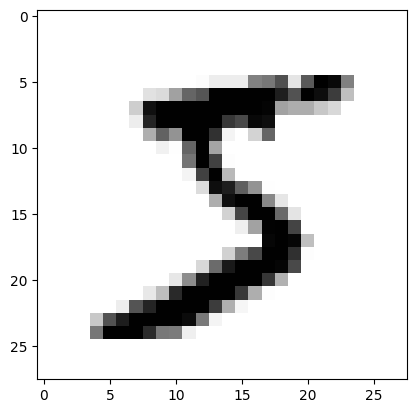

In [5]:
index=0
plt.imshow(x_train[index],cmap=plt.cm.binary)
print(y_train[index])

In [6]:
x_train_flat=x_train.reshape(len(x_train),(28*28))
x_test_flat=x_test.reshape(len(x_test),(28*28))

In [14]:
model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    keras.layers.Dense(64,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(32,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,input_shape=(784,),activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0984 - loss: 0.0798
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0982 - loss: 4.0536e-04
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0981 - loss: 1.0022e-04
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0972 - loss: 3.3511e-05
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0974 - loss: 1.2371e-05


In [16]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0924 - loss: 12.9809


[12.904046058654785, 0.09799999743700027]

In [17]:
y_pred=model.predict(x_test_flat)
y_pred_labels=[np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

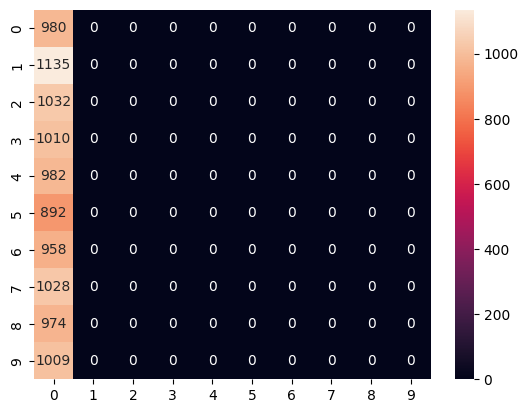

In [18]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
sns.heatmap(confusion_matrix,annot=True,fmt='d')